In [1]:
import numpy as np
import sklearn
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Пункт "A"

In [2]:
data = pd.read_csv('E:/lab1_data/svmdata_a.txt', sep='\t')
data.Color = data.Color.map({'red': 1, 'green': 0})
data_test = pd.read_csv('E:/lab1_data/svmdata_a_test.txt', sep='\t')
data_test.Color = data_test.Color.map({'red': 1, 'green': 0})
data_test

,X1,X2,Color
1,0.034865,-0.002933,1
2,-0.510895,-0.168982,1
3,0.117193,-0.189160,1
4,0.194224,0.087315,1
5,0.223874,0.082128,1
6,0.042781,0.182340,1
7,-0.104377,-0.286665,1
8,-0.079230,0.085910,1
9,-0.217854,0.059281,1
10,-0.008042,-0.013445,1


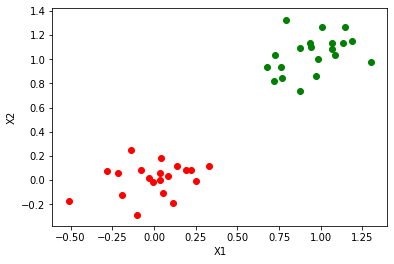

In [3]:
fig, axes = plt.subplots()
axes.scatter(data_test[data_test['Color'] == 0]['X1'],
          data_test[data_test['Color'] == 0]['X2'],
          c='g')
axes.scatter(data_test[data_test['Color'] == 1]['X1'],
          data_test[data_test['Color'] == 1]['X2'],
          c='r')
axes.set_ylabel('X2')
axes.set_xlabel('X1')
plt.show()

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## code from https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
## -------------
def get_info(axes, model, x, y, name, only_plot=False):
    predicted = model.predict(x)
    if not only_plot:
        print(name)
        print('N - Support vectors ', model.support_vectors_.shape)
        print('Accuracy: ', accuracy_score(y, predicted))
        print('Confusion Matrix: ')
        print(confusion_matrix(y, predicted))

    X1, X2 = x.iloc[:, 0], x.iloc[:, 1]
    xx, yy = make_meshgrid(X1, X2)
    
    plot_contours(axes, model, xx, yy,  alpha=0.1)
    axes.scatter(X1, X2, c=y,  edgecolors='k')
    axes.set_title(name + f' (Accuracy: {accuracy_score(y, predicted)})')
    axes.set_xlim(xx.min(), xx.max())
    axes.set_ylim(yy.min(), yy.max())

 Test 
N - Support vectors  (6, 2)
Accuracy:  1.0
Confusion Matrix: 
[[20  0]
 [ 0 20]]
 Train 
N - Support vectors  (6, 2)
Accuracy:  1.0
Confusion Matrix: 
[[20  0]
 [ 0 20]]


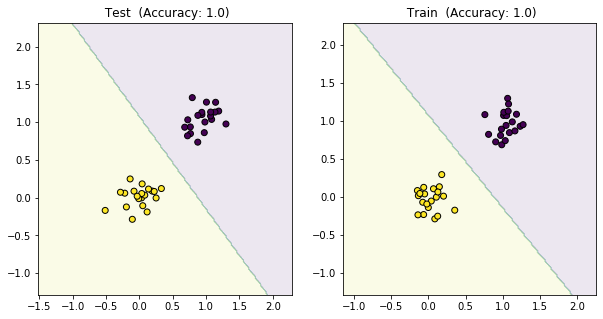

In [5]:
x_train = data[['X1', 'X2']]
y_train = data['Color'] 
x_test = data_test[['X1', 'X2']] 
y_test = data_test['Color']

svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

# Test
fig, (axes1, axes2) = plt.subplots(1,2, figsize=(10, 5))

get_info(axes1, svc, x_test, y_test, ' Test ')

# Train

get_info(axes2, svc, x_train, y_train, ' Train ')
plt.show()

# Пункт "B"

In [6]:
data_b = pd.read_csv('E:/lab1_data/svmdata_b.txt', sep='\t')
data_b.Colors = data_b.Colors.map({'red': 1, 'green': 0})
data_b_test = pd.read_csv('E:/lab1_data/svmdata_b_test.txt', sep='\t')
data_b_test.Colors = data_b_test.Colors.map({'red': 1, 'green': 0})

Test
N - Support vectors  (3, 2)
Accuracy:  1.0
Confusion Matrix: 
[[25  0]
 [ 0 25]]
Train
N - Support vectors  (3, 2)
Accuracy:  0.98
Confusion Matrix: 
[[25  0]
 [ 1 24]]


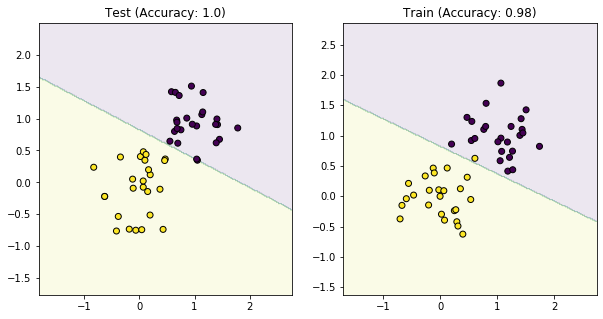

In [7]:
x_train = data_b[['X1', 'X2']]
y_train = data_b['Colors'] 
x_test = data_b_test[['X1', 'X2']] 
y_test = data_b_test['Colors']

svc = SVC(kernel='linear', C=189.5)
svc.fit(x_train, y_train)

# Test
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
get_info(ax1, svc, x_test, y_test, 'Test')

# Train
get_info(ax2, svc, x_train, y_train, 'Train')
plt.show()

# Пункт "C"

In [8]:
data_c = pd.read_csv('E:/lab1_data/svmdata_c.txt', sep='\t')
data_c.Colors = data_c.Colors.map({'red': 1, 'green': 0})
data_c_test = pd.read_csv('E:/lab1_data/svmdata_c_test.txt', sep='\t')
data_c_test.Colors = data_c_test.Colors.map({'red': 1, 'green': 0})

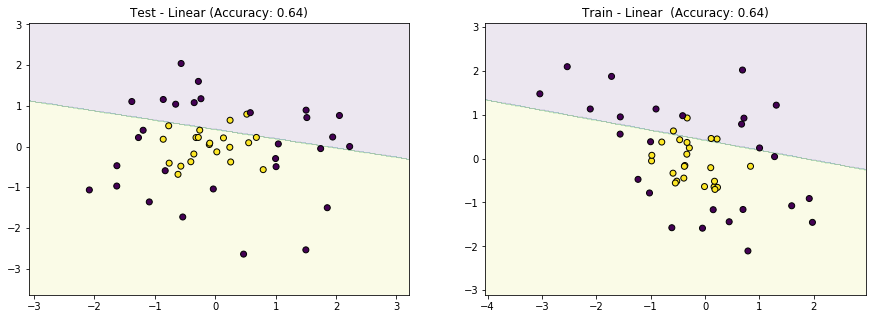

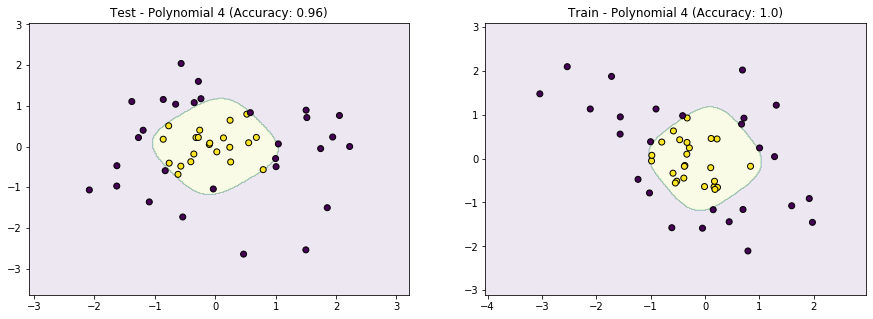

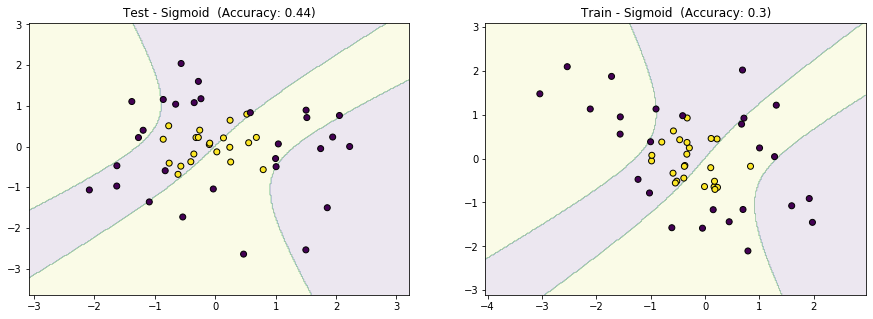

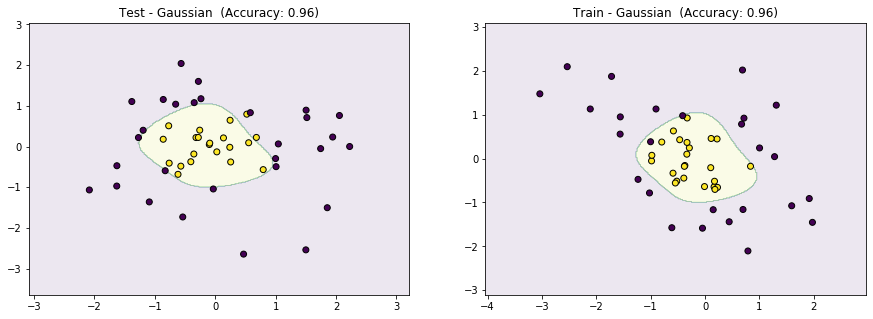

In [9]:

x_train = data_c[['X1', 'X2']]
y_train = data_c['Colors'] 
x_test = data_c_test[['X1', 'X2']] 
y_test = data_c_test['Colors']


svc = SVC(kernel='linear', C=10)
svc.fit(x_train, y_train)

# Test Linear
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Linear', True)

# Train Linear
get_info(ax2, svc, x_train, y_train, 'Train - Linear ', True)
plt.show()

# Kenel poly with degree 4 and gamma 2 we can get better accuracy
svc = SVC(kernel='poly', degree=4, gamma=2)
svc.fit(x_train, y_train)

# Test Polynomial
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Polynomial 4', True)
# Train Polynomial
get_info(ax2, svc, x_train, y_train, 'Train - Polynomial 4', True)


svc = SVC(kernel='sigmoid')
svc.fit(x_train, y_train)

# Test Sigmoid
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Sigmoid ', True)
# Train Sigmoid
get_info(ax2, svc, x_train, y_train, 'Train - Sigmoid ', True)

# Kernel gaussian with gamma 2 we can get better accuracy
svc = SVC(kernel='rbf', gamma = 2)
svc.fit(x_train, y_train)

# Test Gaussian
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Gaussian ', True)
# Train Gaussian
get_info(ax2, svc, x_train, y_train, 'Train - Gaussian ', True)


We can get better accuracy with Polynomial 4 (gamma =2) and Gaussian (gamma = 2)
   

# Пункт "D"

In [10]:
data_d = pd.read_csv('E:/lab1_data/svmdata_d.txt', sep='\t')
data_d.Colors = data_d.Colors.map({'red': 1, 'green': 0})
data_d_test = pd.read_csv('E:/lab1_data/svmdata_d_test.txt', sep='\t')
data_d_test.Colors = data_d_test.Colors.map({'red': 1, 'green': 0})

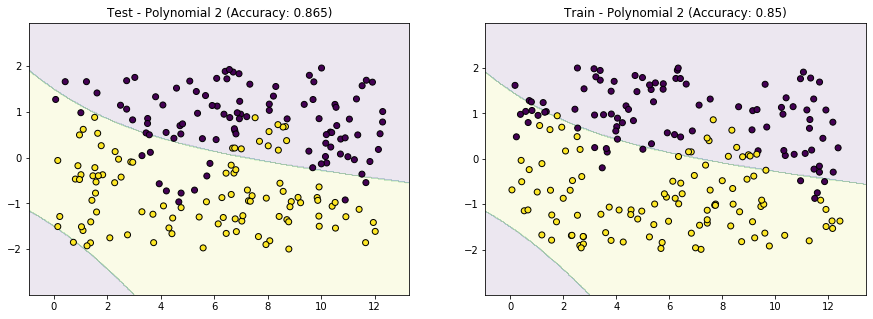

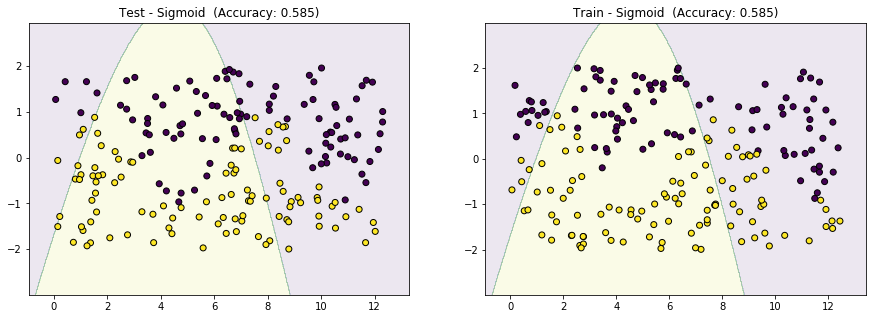

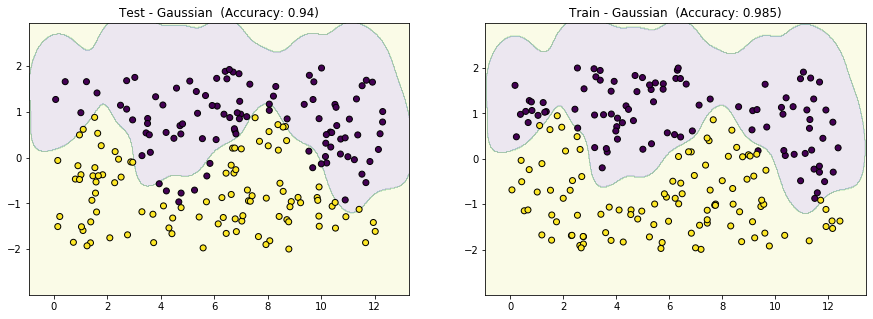

In [11]:
x_train = data_d[['X1', 'X2']]
y_train = data_d['Colors'] 
x_test = data_d_test[['X1', 'X2']] 
y_test = data_d_test['Colors']



# Kenel poly with degree 2 and gamma 2 we can get better accuracy
svc = SVC(kernel='poly', degree=2, gamma= 2)
svc.fit(x_train, y_train)

# Test Polynomial
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Polynomial 2', True)
# Train Polynomial
get_info(ax2, svc, x_train, y_train, 'Train - Polynomial 2', True)


svc = SVC(kernel='sigmoid')
svc.fit(x_train, y_train)

# Test Sigmoid
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Sigmoid ', True)
# Train Sigmoid
get_info(ax2, svc, x_train, y_train, 'Train - Sigmoid ', True)

# Kernel gaussian with gamma 2.5 we can get better accuracy
svc = SVC(kernel='rbf', gamma = 2.5)
svc.fit(x_train, y_train)

# Test Gaussian
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Gaussian ', True)
# Train Gaussian
get_info(ax2, svc, x_train, y_train, 'Train - Gaussian ', True)


We can get better accuracy with Gaussian (gamma = 2.5)

# Пункт "E"

In [12]:
data_e = pd.read_csv('E:/lab1_data/svmdata_e.txt', sep='\t')
data_e.Colors = data_e.Colors.map({'red': 1, 'green': 0})
data_e_test = pd.read_csv('E:/lab1_data/svmdata_e_test.txt', sep='\t')
data_e_test.Colors = data_e_test.Colors.map({'red': 1, 'green': 0})

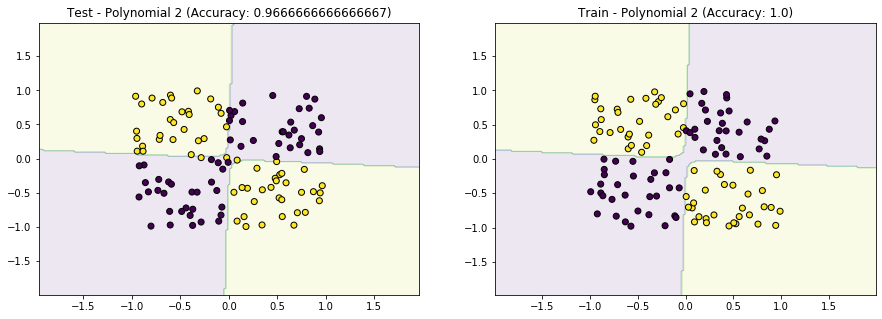

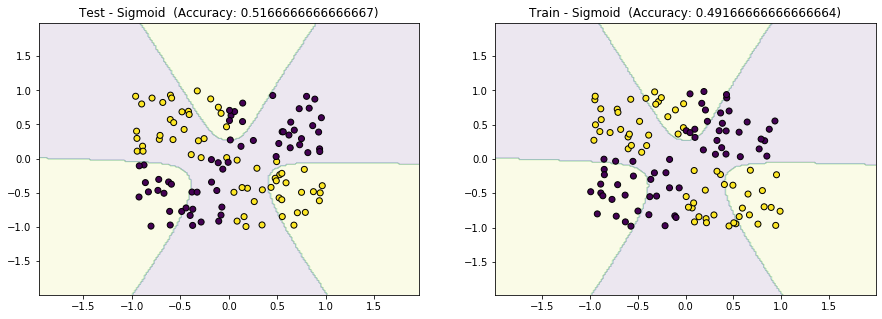

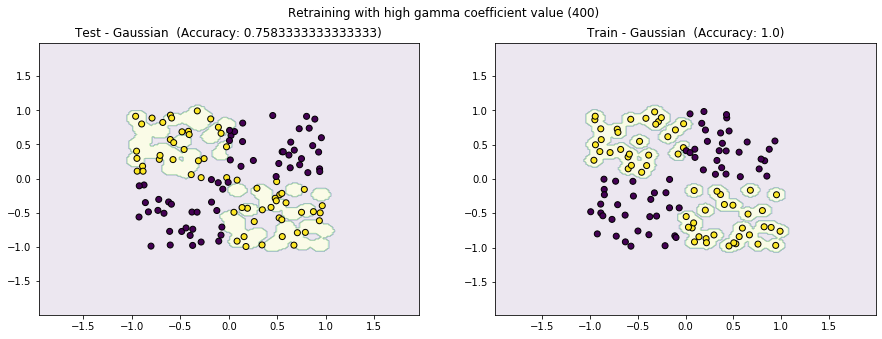

In [13]:
x_train = data_e[['X1', 'X2']]
y_train = data_e['Colors'] 
x_test = data_e_test[['X1', 'X2']] 
y_test = data_e_test['Colors']



# Kenel poly with degree 2  we can get better accuracy
svc = SVC(kernel='poly', degree=2, C= 100)
svc.fit(x_train, y_train)

# Test Polynomial
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Polynomial 2', True)
# Train Polynomial
get_info(ax2, svc, x_train, y_train, 'Train - Polynomial 2', True)


svc = SVC(kernel='sigmoid')
svc.fit(x_train, y_train)

# Test Sigmoid
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
get_info(ax1, svc, x_test, y_test, 'Test - Sigmoid ', True)
# Train Sigmoid
get_info(ax2, svc, x_train, y_train, 'Train - Sigmoid ', True)


svc = SVC(kernel='rbf', gamma = 400)
svc.fit(x_train, y_train)

# Test Gaussian
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Retraining with high gamma coefficient value (400)')
get_info(ax1, svc, x_test, y_test, 'Test - Gaussian ', True)
# Train Gaussian
get_info(ax2, svc, x_train, y_train, 'Train - Gaussian ', True)


We can get better accuracy with Polynomial 2 and Gaussian (gamma = 400)